<a href="https://colab.research.google.com/github/adamgrzanek/Insurance_charges/blob/main/projekt_ag__insurance_charges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Przewidywanie opłat za ubezpieczenie

https://www.kaggle.com/datasets/mirichoi0218/insurance

### Spis treści:
1. [Import bibliotek](#0)
2. [Wczytanie danych i utworzenie kopii](#1)
3. [Eksplorcja i wstępne przygotowanie danych](#2)
4. [Podział danych na zbiór treningowy i testowy](#3)
5. [Regresja liniowa](#4)
6. [Regresja - Las losowy](#5)

### <a name='0'></a> Import bibliotek

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

### <a name='1'></a> Wczytanie danych i utworzenie kopii

In [ ]:
df_raw = pd.read_csv('insurance.csv')
df = df_raw.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### <a name='2'></a> Eksplorcja i wstępne przygotowanie danych

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# spr czy są braki danych w każdej kolumnie
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# sprawdzenie czy są duplikaty
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
# usunięcie duplikatów
df.drop_duplicates(inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# kolumny do zmiany typu danych na kategoryczne
cat_cols = [col for col in df.columns if df[col].dtype == 'O'] # O -> object
cat_cols

['sex', 'smoker', 'region']

In [ ]:
for col in cat_cols:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.6 KB


In [ ]:
# podstawowe statystyki
df.describe()#.T

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# podstawowe statystyki dla zmiennych kategorycznych
df.describe(include=['category']).T

,count,unique,top,freq
sex,1337,2,male,675
smoker,1337,2,no,1063
region,1337,4,southeast,364


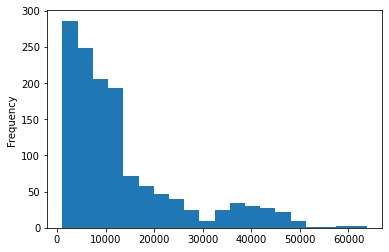

In [ ]:
# histogram zmiennej charges
df['charges'].plot(kind='hist', bins=20)

In [ ]:
# spr wierszy z charges > 50000
df[df['charges'] > 50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [ ]:
# spr rozkładu zmiennej smoker
df.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

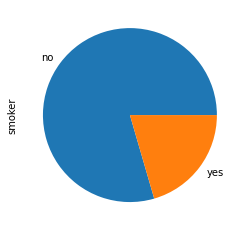

In [ ]:
# rozkład smoker na wykresie
df.smoker.value_counts().plot(kind='pie')

In [ ]:
# rozkład płci
df.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

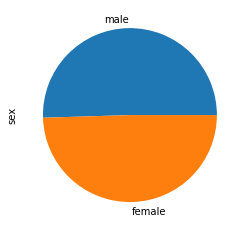

In [ ]:
# rozkład płci na wykresie
df.sex.value_counts().plot(kind='pie')

In [ ]:
# spr rozkładu zmiennej region
df.region.value_counts()

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

In [ ]:
# spr rozkładu wg smoker i sex
# import plotly.express as px

px.histogram(df, x='charges', width=600, height=400, nbins=50, facet_col='smoker', facet_row='sex')

In [ ]:
# spr rozkładu smoker
px.histogram(df, x='smoker', facet_col='sex', color='sex', width=600, height=400)

In [ ]:
# spr rozkładu wg bmi i sex
px.histogram(df, x='bmi', width=600, height=400, nbins=50, facet_row='sex')

In [ ]:
# zakodowanie kolumn kategorycznych
df_dummies = pd.get_dummies(data=df, drop_first=True)

In [ ]:
df_dummies

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [ ]:
# zbadanie korelacji poszczególnych zmiennych
corr = df_dummies.corr() # objekt DataFrame
corr

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109344,0.041536,0.298308,-0.019814,-0.025587,0.001495,-0.012311,0.009415
bmi,0.109344,1.000000,0.012755,0.198401,0.046397,0.003746,-0.136138,0.270057,-0.006211
children,0.041536,0.012755,1.000000,0.067389,0.017848,0.007331,0.026044,-0.023492,0.021538
charges,0.298308,0.198401,0.067389,1.000000,0.058044,0.787234,-0.038695,0.073578,-0.043637
sex_male,-0.019814,0.046397,0.017848,0.058044,1.000000,0.076596,-0.012482,0.017578,-0.003767
smoker_yes,-0.025587,0.003746,0.007331,0.787234,0.076596,1.000000,-0.036321,0.068282,-0.037168
region_northwest,0.001495,-0.136138,0.026044,-0.038695,-0.012482,-0.036321,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,0.270057,-0.023492,0.073578,0.017578,0.068282,-0.345909,1.000000,-0.346614
region_southwest,0.009415,-0.006211,0.021538,-0.043637,-0.003767,-0.037168,-0.320493,-0.346614,1.000000


<ipython-input-24-9e8e4d6e6809>:8: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



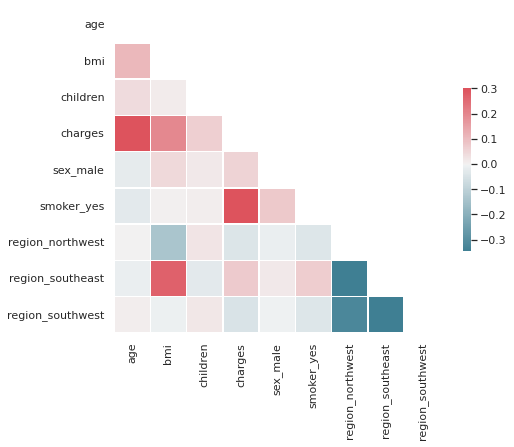

In [ ]:
# wizualizacja korelacji poszczególnych zmiennych (heatmap - mapa ciepła)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.set(style="white") 
mask = np.zeros_like(corr, dtype=np.bool) # tablica nupmy, wymiar(kształt) jak corr, dane bool(False)
mask[np.triu_indices_from(mask)] = True # 'trójkąt' po przekątnej True
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# posortowanie współczynników korelacji
df_dummies.corr()['charges'].sort_values(ascending=False) # wycięcie z df_dummies kolumny charges i posortowanie malejąco

charges             1.000000
smoker_yes          0.787234
age                 0.298308
bmi                 0.198401
region_southeast    0.073578
children            0.067389
sex_male            0.058044
region_northwest   -0.038695
region_southwest   -0.043637
Name: charges, dtype: float64

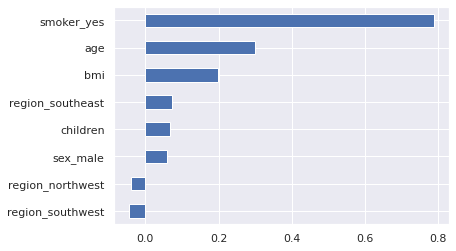

In [ ]:
# wykres powyższych posortowanych współczynników (bez pierwszego)
sns.set()
df_dummies.corr()['charges'].sort_values()[:-1].plot(kind='barh') # układ poziomy
#df_dummies.corr()['charges'].sort_values()[:-1].plot(kind='bar') # układ pionowy

In [ ]:
# przygotowanie danych do modelu
data = df_dummies.copy() # dane po kodowaniu
target = data.pop('charges') # nowy objekt target z klumną charges (zabranej z data; w data nie ma już kolumny charges)
data.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [ ]:
target.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### <a name='3'></a> Podział danych na zbiór treningowy i testowy

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

print(f'X_trian shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_trian shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_trian shape: (1069, 8)
X_test shape: (268, 8)
y_trian shape: (1069,)
y_test shape: (268,)


### <a name='4'></a> Regresja liniowa

In [ ]:
# budowanie modelu regresji liniowej na przygotowanych zmiennych
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() # stworzenie instancji klasy LinearRegression
regressor.fit(X_train, y_train) # dopasowanie modelu na danych treningowych

LinearRegression()

In [ ]:
# sprawdzenie dopasowania
print(f'R2 score: {regressor.score(X_test, y_test):.4f}')
# R2 score: 0.7688
# R2 score: 0.7946
# R2 score: 0.7402
# R2 score: 0.7335
# R2 score: 0.7082

R2 score: 0.6701


In [ ]:
# predykcja (przewidywanie)
y_pred = regressor.predict(X_test)
y_pred[:10]

array([ 2650.07780126,  7034.92609106,  5896.38553889,  6048.11475092,
        7565.13469941, 13860.19114502, 16655.73702585, 11687.61908963,
        8202.04004563, 13380.22087759])

In [ ]:
# stworzenie DataFrame z danymi do porównania (dane przewidziane przez model vs dane faktyczne)
y_true = y_test.copy() # dane zaobserwowane 
predictions = pd.DataFrame(data={'y_true': y_true, 'LinearRegression_y_pred': y_pred})
predictions['LinearRegression_error'] = predictions['y_true'] -  predictions['LinearRegression_y_pred'] # nowa kolumna z różnicą
predictions.head()

,y_true,LinearRegression_y_pred,LinearRegression_error
397,16586.49771,2650.077801,13936.419909
1128,14358.36437,7034.926091,7323.438279
1014,5383.53600,5896.385539,-512.849539
204,7147.10500,6048.114751,1098.990249
1262,6770.19250,7565.134699,-794.942199


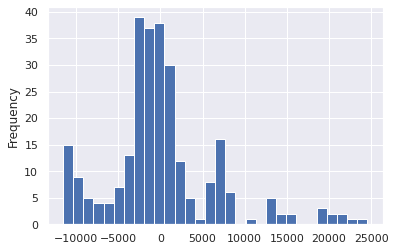

In [ ]:
# histogram błędów
predictions.LinearRegression_error.plot(kind='hist', bins=30)

In [ ]:
# inne metryki (do oceny modelu)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
print(f'MAE modelu regresji liniowej wynosi: {mae:.2f}')
# MAE modelu regresji liniowej wynosi: 4429.36
# MAE modelu regresji liniowej wynosi: 3812.81
# MAE modelu regresji liniowej wynosi: 4201.68
# MAE modelu regresji liniowej wynosi: 4331.53

MAE modelu regresji liniowej wynosi: 4456.57


### Sprawdzenie współczynników

In [ ]:
# Współczynnik w0 (punkt przecięcia)
regressor.intercept_

-12074.800848790092

In [ ]:
# Współczynniki pozostałe (tyle ile zmiennych)
regressor.coef_

array([  258.55509365,   333.62967373,   586.36088977,  -148.47426639,
       24349.13804749,  -392.97249284,  -905.49652923, -1062.08616586])

In [ ]:
regressor.coef_[7]

-1062.0861658585043

In [ ]:
# wartości powyższych współczynników wg kolejności kolumn
data.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
X_test.head(2)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
397,21,31.02,0,1,0,0,1,0
1128,34,32.80,1,1,0,0,0,1


In [ ]:
X_test.iloc[0] # iloc[nr wiersza]

age                 21.00
bmi                 31.02
children             0.00
sex_male             1.00
smoker_yes           0.00
region_northwest     0.00
region_southeast     1.00
region_southwest     0.00
Name: 397, dtype: float64

In [ ]:
X_test.loc[397] # loc[wiersz o danym indeksie]

age                 21.00
bmi                 31.02
children             0.00
sex_male             1.00
smoker_yes           0.00
region_northwest     0.00
region_southeast     1.00
region_southwest     0.00
Name: 397, dtype: float64

In [ ]:
y_pred[0]

2650.0778012585797

In [ ]:
X_test.iloc[0]

age                 21.00
bmi                 31.02
children             0.00
sex_male             1.00
smoker_yes           0.00
region_northwest     0.00
region_southeast     1.00
region_southwest     0.00
Name: 397, dtype: float64

In [ ]:
X_test.iloc[0]['age']

21.0

In [ ]:
# Końcowa postać modelu
# y = w0 + w1 * X1 + w2 * X2 + ... +wn * Xn

i = 0
y = (regressor.intercept_ + 
     regressor.coef_[0] * X_test.iloc[i]['age'] + 
     regressor.coef_[1] * X_test.iloc[i]['bmi'] + 
     regressor.coef_[2] * X_test.iloc[i]['children'] + 
     regressor.coef_[3] * X_test.iloc[i]['sex_male'] + 
     regressor.coef_[4] * X_test.iloc[i]['smoker_yes'] + 
     regressor.coef_[5] * X_test.iloc[i]['region_northwest'] + 
     regressor.coef_[6] * X_test.iloc[i]['region_southeast'] + 
     regressor.coef_[7] * X_test.iloc[i]['region_southwest'])

y

2650.0778012585783

In [ ]:
np.isclose(y, y_pred[i])

True

### <a name='5'></a> Regresja - Las losowy

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
preds = rf_regressor.predict(X_test)
preds[:10]

array([ 1592.9977285,  5251.459905 ,  6820.754592 ,  9734.4965678,
        6729.034776 , 12405.5849767, 14440.4726795, 10914.0527953,
        8525.2441462,  9791.5748371])

In [ ]:
# from sklearn.metrics import mean_absolute_error
mae_rfr = mean_absolute_error(y_test, preds)
print(f'MAE modelu regresji lasów losowych wynosi: {mae_rfr:.2f}')

# MAE modelu regresji lasów losowych wynosi: 2334.13
# MAE modelu regresji lasów losowych wynosi: 2680.52
# MAE modelu regresji lasów losowych wynosi: 2841.44
# MAE modelu regresji lasów losowych wynosi: 2938.21

MAE modelu regresji lasów losowych wynosi: 3080.64


In [ ]:
#########
rf_regressor.feature_importances_

array([0.12353612, 0.20135654, 0.01753441, 0.00489439, 0.64030261,
       0.00449607, 0.00452702, 0.00335283])

In [ ]:
# dodanie do df z danymi do porównania wyników z 2-go modelu
predictions['RandomForestRegressor'] = preds
predictions['RandomForestRegressor_error'] = predictions['y_true'] - predictions['RandomForestRegressor']
predictions

,y_true,LinearRegression_y_pred,LinearRegression_error,RandomForestRegressor,RandomForestRegressor_error
397,16586.49771,2650.077801,13936.419909,1592.997728,14993.499982
1128,14358.36437,7034.926091,7323.438279,5251.459905,9106.904465
1014,5383.53600,5896.385539,-512.849539,6820.754592,-1437.218592
204,7147.10500,6048.114751,1098.990249,9734.496568,-2587.391568
1262,6770.19250,7565.134699,-794.942199,6729.034776,41.157724
...,...,...,...,...,...
613,6753.03800,4814.118805,1938.919195,11611.351367,-4858.313367
1337,29141.36030,37351.840034,-8210.479734,28536.196802,605.163498
1260,4544.23480,3045.043053,1499.191747,5504.778577,-960.543777
269,9282.48060,9653.276132,-370.795532,9809.512636,-527.032036


In [ ]:
# posortowane wartości błędów Regresji liniowej
predictions['LinearRegression_error'].sort_values()

1100   -11573.731638
380    -11411.787849
411    -11393.309007
1085   -11309.867163
1304   -11107.478817
            ...     
387     20337.897412
1206    22009.710094
1027    22020.983400
819     22867.856986
242     24548.855288
Name: LinearRegression_error, Length: 268, dtype: float64

In [ ]:
# indeksy posortowanych wartości błędów Regresji liniowej
predictions['LinearRegression_error'].sort_values().index

Int64Index([1100,  380,  411, 1085, 1304,   85,  727,  235,  376,  793,
            ...
             696,  599,  468, 1008, 1039,  387, 1206, 1027,  819,  242],
           dtype='int64', length=268)

In [ ]:
# wycinej df z posortowanymi błędami Regresji liniowej
predictions.loc[predictions['LinearRegression_error'].sort_values().index][['LinearRegression_error', 'RandomForestRegressor_error']]

,LinearRegression_error,RandomForestRegressor_error
1100,-11573.731638,-608.494562
380,-11411.787849,-904.196929
411,-11393.309007,-602.140597
1085,-11309.867163,-7260.040735
1304,-11107.478817,563.857906
...,...,...
387,20337.897412,20553.439537
1206,22009.710094,24147.364410
1027,22020.983400,18514.717792
819,22867.856986,17334.120928


In [ ]:
# wycinej df z posortowanymi błędami Regresji Lasów losowych
predictions.loc[predictions['RandomForestRegressor_error'].sort_values().index][['LinearRegression_error', 'RandomForestRegressor_error']]

,LinearRegression_error,RandomForestRegressor_error
714,1849.036141,-9980.360932
939,-922.406900,-9243.394630
1105,-1065.337086,-9207.119168
85,-11080.488763,-9000.956450
88,-653.981515,-8421.235166
...,...,...
1027,22020.983400,18514.717792
468,19423.952072,18548.975888
387,20337.897412,20553.439537
242,24548.855288,23731.666968
